### The SQL query used to extract the data is included.

```
select *
from city_data
where city = 'New York'


select *
from city_data
where city = 'Los Angeles'


select *
from global_data

```

#### csv File is stored in the folder and analized and visualized with python panda as follows 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
nyc_data = pd.read_csv('NYC.csv')

In [3]:
globle_data = pd.read_csv('Global_data.csv')

In [4]:
los_angeles_data = pd.read_csv('los_angeles.csv')

In [5]:
result= pd.merge(nyc_data,los_angeles_data, on = 'year' )

In [6]:
f_result = pd.merge(result, globle_data, on='year')

In [7]:
f_result.head()

,year,city_x,country_x,avg_temp_x,city_y,country_y,avg_temp_y,avg_temp
0,1849,New York,United States,8.83,Los Angeles,United States,15.71,7.98
1,1850,New York,United States,9.10,Los Angeles,United States,15.28,7.90
2,1851,New York,United States,9.26,Los Angeles,United States,15.53,8.18
3,1852,New York,United States,8.98,Los Angeles,United States,15.61,8.10
4,1853,New York,United States,9.68,Los Angeles,United States,16.27,8.04


In [8]:
f_result['new_york_temp']=f_result['avg_temp_x']
f_result['los_angeles_temp']=f_result['avg_temp_y']
f_result['globle_temp'] = f_result['avg_temp'] 

In [9]:
select = ['year', 'new_york_temp', 'los_angeles_temp', 'globle_temp']

In [10]:
temp_comp= f_result[select]

## 7 Day Moving Average calculation

In [11]:
temp_comp['new_york_temp_7MA']= temp_comp['new_york_temp'].rolling(7).mean()
temp_comp['los_angeles_temp_7MA']= temp_comp['los_angeles_temp'].rolling(7).mean()
temp_comp['globle_temp_7MA']= temp_comp['globle_temp'].rolling(7).mean()

E:\soft\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\soft\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\soft\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [12]:
temp_comp.head(20)

,year,new_york_temp,los_angeles_temp,globle_temp,new_york_temp_7MA,los_angeles_temp_7MA,globle_temp_7MA
0,1849,8.83,15.71,7.98,NaN,NaN,NaN
1,1850,9.10,15.28,7.90,NaN,NaN,NaN
2,1851,9.26,15.53,8.18,NaN,NaN,NaN
3,1852,8.98,15.61,8.10,NaN,NaN,NaN
4,1853,9.68,16.27,8.04,NaN,NaN,NaN
5,1854,9.56,15.74,8.21,NaN,NaN,NaN
6,1855,9.11,10.20,8.11,9.217143,14.905714,8.074286
7,1855,9.11,15.94,8.11,9.257143,14.938571,8.092857
8,1856,8.20,12.01,8.00,9.128571,14.471429,8.107143
9,1856,8.20,15.52,8.00,8.977143,14.470000,8.081429


## Line chart creation 

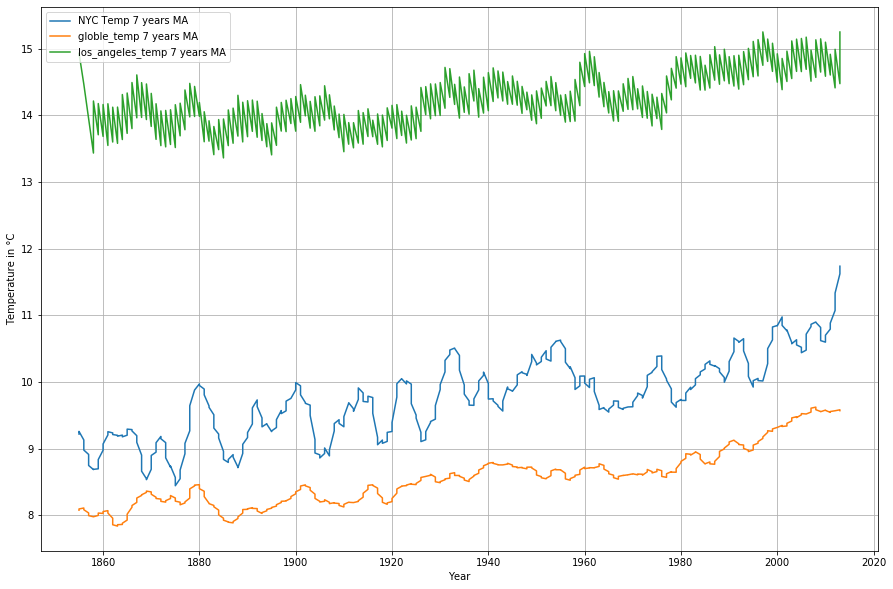

In [13]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(temp_comp['year'],temp_comp['new_york_temp_7MA'], label="NYC Temp 7 years MA")
plt.plot(temp_comp['year'],temp_comp['globle_temp_7MA'], label="globle_temp 7 years MA")
plt.plot(temp_comp['year'],temp_comp['los_angeles_temp_7MA'], label="los_angeles_temp 7 years MA")
plt.xlabel('Year')
plt.ylabel('Temperature in °C')

plt.legend(loc=2)


## Observations

1. New york temperatue is almost 1 degree higher then globle average temperater and themperature change flactuation is high rater then globle average temperater.

2. Los Angeles temperatue is  almost 4 degree higher the new york and temperature change is less flactuated then new york. 

3. New york temperature and globle temperature is gradually increase over time, that means world is getting warmer over time.

4. Last few years the New york temperature rising faster then the globle temperature.